In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
my_img = cv2.imread("./red_blue.png",1)
my_img_rgb = cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB)
print(my_img_rgb.shape)

(568, 829, 3)


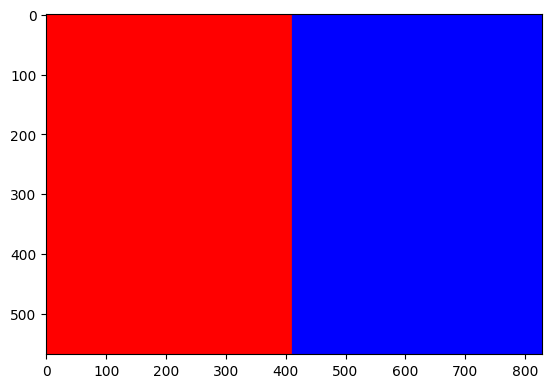

In [5]:
# Histogram, bir görüntüdeki piksellerin renk yoğunluğu.

plt.imshow(my_img_rgb)

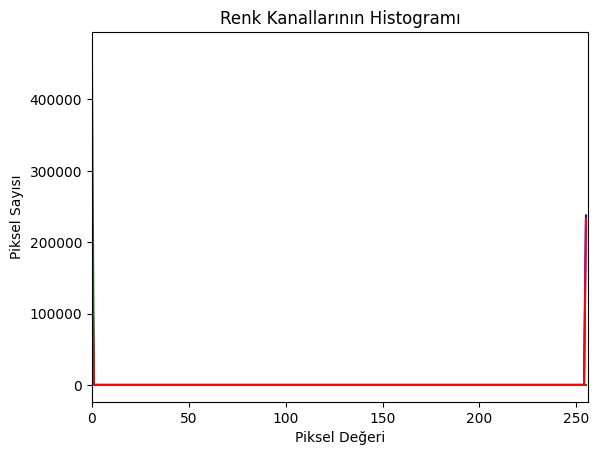

In [7]:
channels = cv2.split(my_img)
colors = ('b', 'g', 'r')


plt.figure()
plt.title('Renk Kanallarının Histogramı')
plt.xlabel('Piksel Değeri')
plt.ylabel('Piksel Sayısı')

for channel, color in zip(channels, colors):
    histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color)

plt.xlim([0, 256])


plt.savefig('histogram_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [9]:
#Yükseklik = 568
#Genişlik = 829
print(f"Tek kanaldaki toplam piksel sayısı = {my_img_rgb.shape[0]*my_img_rgb.shape[1]}")

Tek kanaldaki toplam piksel sayısı = 470872


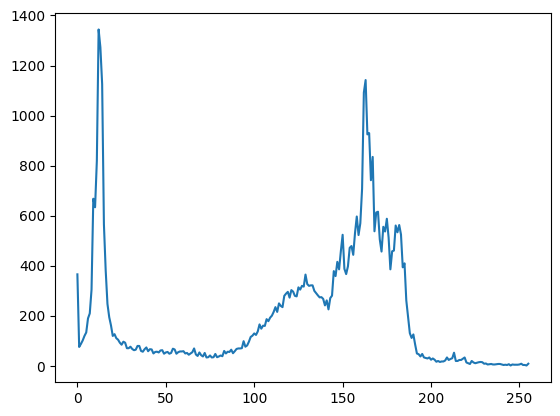

In [11]:
img_gray = cv2.imread("./cameraman.jfif",0)

histr = cv2.calcHist([img_gray],[0],None,[256],[0,256])

plt.plot(histr)
plt.show()

Text(0.5, 1.0, 'Equalized Histogram Image')

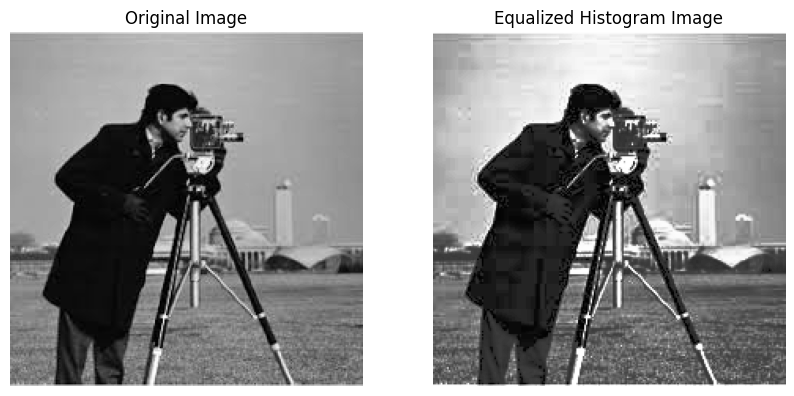

In [13]:
img_gray = cv2.imread("./cameraman.jfif",0)
img_eq_hist = cv2.equalizeHist(img_gray)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img_gray, cmap="gray")
plt.axis('off')
plt.title('Original Image')

fig.add_subplot(rows, columns, 2)
plt.imshow(img_eq_hist, cmap="gray")
plt.axis('off')
plt.title('Equalized Histogram Image')

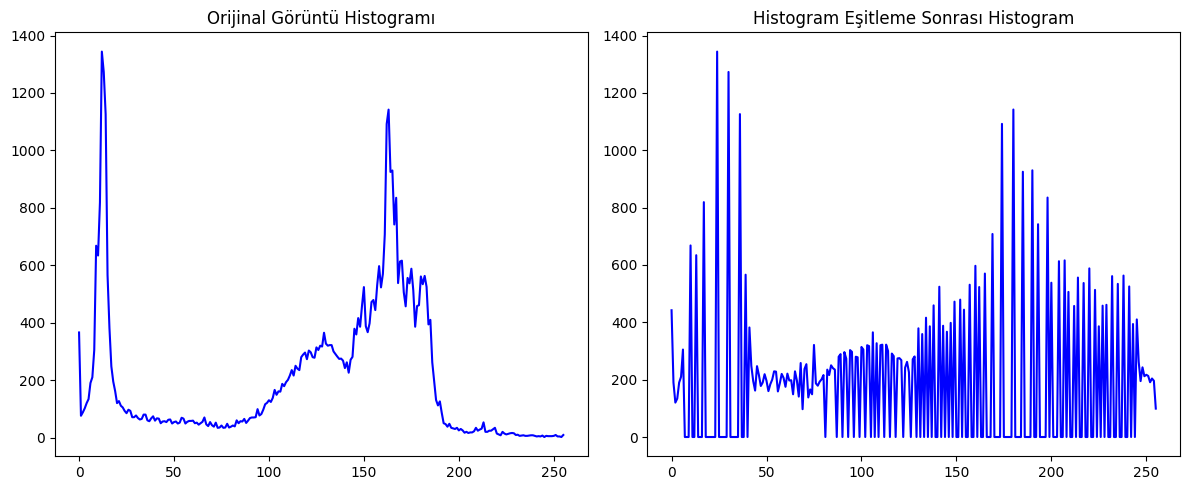

In [15]:
hist_org = cv2.calcHist([img_gray],[0],None,[256],[0,256])
hist_eq = cv2.calcHist([img_eq_hist],[0],None,[256],[0,256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_org, color='b')
plt.title('Orijinal Görüntü Histogramı')

plt.subplot(1, 2, 2)
plt.plot(hist_eq, color='b')
plt.title('Histogram Eşitleme Sonrası Histogram')
#plt.xlabel('Piksel Değeri')
#plt.ylabel('Piksel Sayısı')
#plt.xlim([0, 256])

#Görüntüyü kaydetmek için:
plt.tight_layout()
plt.savefig('histogram_grafikleri.png', dpi=300) 
plt.show()

Text(0.5, 1.0, 'Adaptive Equalized Histogram Image')

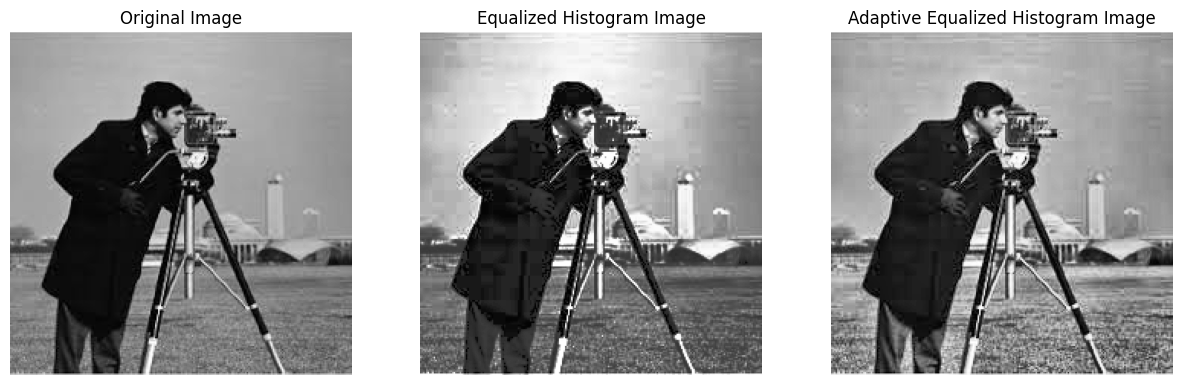

In [19]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_adaptive_eq_hist = clahe.apply(img_gray)

fig = plt.figure(figsize=(15, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(img_gray, cmap="gray")
plt.axis('off')
plt.title('Original Image')

fig.add_subplot(rows, columns, 2)
plt.imshow(img_eq_hist, cmap="gray")
plt.axis('off')
plt.title('Equalized Histogram Image')

fig.add_subplot(rows, columns, 3)
plt.imshow(img_adaptive_eq_hist, cmap="gray")
plt.axis('off')
plt.title('Adaptive Equalized Histogram Image')